In [17]:
import torch 
import torch.nn as nn
import torch.optim as optim 
import torchmetrics 
import matplotlib.pyplot as plt
import numpy as np

### Implementing ReLU
The rectified linear unit (or ReLU) function is one of the most common activation functions in deep learning.

It overcomes the training problems linked with the sigmoid function you learned, such as the vanishing gradients problem.

In [2]:
relu_pytorch = nn.ReLU()

x = torch.tensor(-1.0, requires_grad=True)
y = relu_pytorch(x)

In [3]:
y.backward()

In [4]:
gradient = x.grad
print(gradient)

tensor(0.)


### Implementing leaky ReLU
You've learned that ReLU is one of the most used activation functions in deep learning. You will find it in modern architecture. However, it does have the inconvenience of outputting null values for negative inputs and therefore, having null gradients. Once an element of the input is negative, it will be set to zero for the rest of the training. Leaky ReLU overcomes this challenge by using a multiplying factor for negative inputs.

In [5]:
leaky_relu_pytorch = nn.LeakyReLU()

In [6]:
x = torch.tensor(-1.0, requires_grad=True)
y = leaky_relu_pytorch(x)
y.backward()
print(x.grad)

tensor(0.0100)

### Counting the number of parameters
Deep learning models are famous for having a lot of parameters. Recent language models have billions of parameters. With more parameters comes more computational complexity and longer training times, and a deep learning practitioner must know how many parameters their model has

In [7]:
model = nn.Sequential(
    nn.Linear(8,4),
    nn.Linear(4,2),
    nn.Linear(2,1)
)

In [8]:
total = 0

In [9]:
for parameter in model.parameters():
    total += parameter.numel()

In [10]:
total # ((9 * 4) + (5 * 2) + (3 * 1))

49

### Manipulating the capacity of a network
In this exercise, you will practice creating neural networks with different capacities. The capacity of a network reflects the number of parameters in said network. To help you, a calculate_capacity() function has been implemented, as follows:

In [12]:
def calculate_capacity(model):
  total = 0
  for p in model.parameters():
    total += p.numel()
  return total

In [13]:
n_features = 8
n_classes = 2

input_tensor = torch.Tensor([[3, 4, 6, 2, 3, 6, 8, 9]])

# Create a neural network with more than 120 parameters
model = nn.Sequential(nn.Linear(n_features, 10), 
                    nn.Linear(10, 2), 
                    nn.Linear(2, 3),
                    nn.Linear(3, n_classes))

output = model(input_tensor)

print(calculate_capacity(model))

129


### Experimenting with learning rate

In [20]:
def function(x):
    return x**4 + x**3 - 5*x**2

In [21]:
def optimize_and_plot(lr=0.01, momentum=0.0):
  x = torch.tensor(2.0, requires_grad=True)
  buffer = torch.zeros_like(x.data)
  values = []
  for i in range(10):
      y = function(x)
      values.append((x.clone(), y.clone()))
      y.backward()

      d_p = x.grad.data
      if momentum !=0 :
          buffer.mul_(momentum).add_(d_p)
          d_p = buffer

      x.data.add_(d_p, alpha=-lr)
      x.grad.zero_()
      
  x = np.arange(-3, 2, 0.001)
  y = function(x)

  plt.figure(figsize=(10, 5))
  plt.plot([v[0].detach().numpy() for v in values], [v[1].detach().numpy() for v in values], 'r-X', 
           linewidth=2, markersize=7)
  for i in range(10):
      plt.text(values[i][0]+0.1, values[i][1], f'step {i}', fontdict={'color': 'r'})
  plt.plot(x, y, linewidth=2)
  plt.grid()
  plt.tick_params(axis='both', which='major', labelsize=12)
  plt.legend(['Optimizer steps', 'Square function'])
  plt.show()

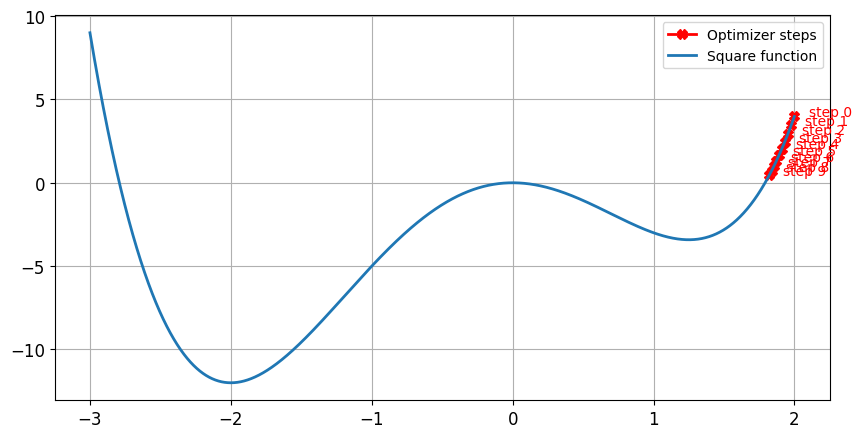

In [22]:
# Try a first learning rate value
lr0 = 0.001
optimize_and_plot(lr=lr0)

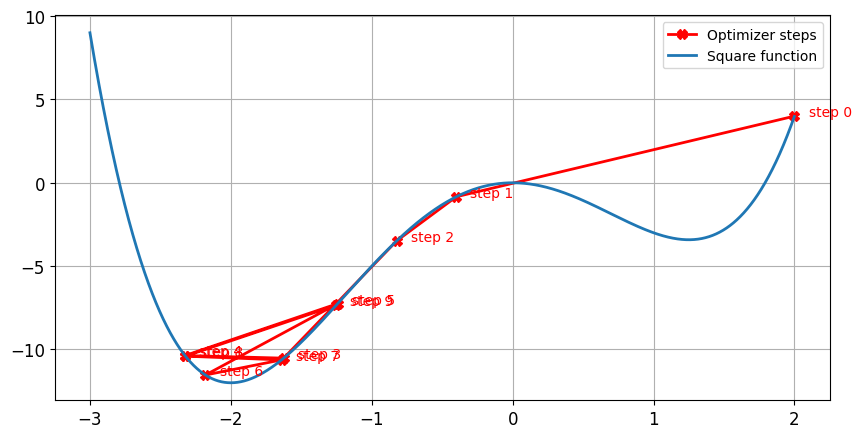

In [23]:
# Try a second learning rate value
lr1 = 0.1
optimize_and_plot(lr=lr1)

### Experimenting with momentum
In this exercise, your goal is to find the optimal momentum such that the optimizer can find the minimum of the following non-convex function  in 20 steps. You will experiment with two different momentum values. For this problem, the learning rate is fixed at 0.01.

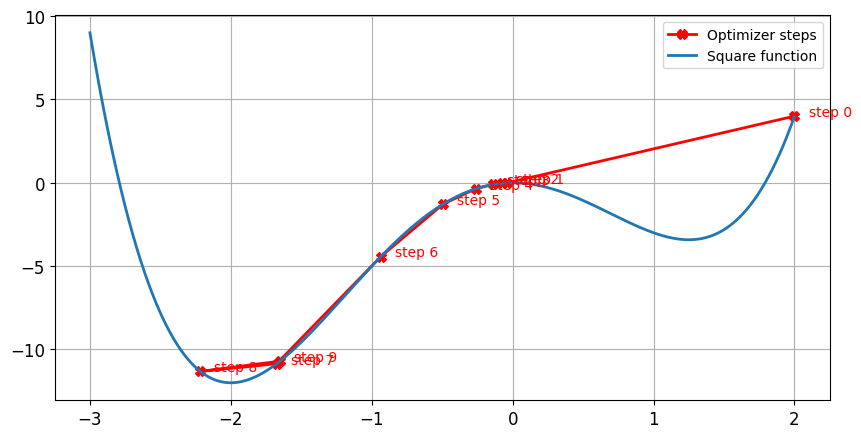

In [24]:
# Try a third learning rate value
lr2 = 0.085
optimize_and_plot(lr=lr2)

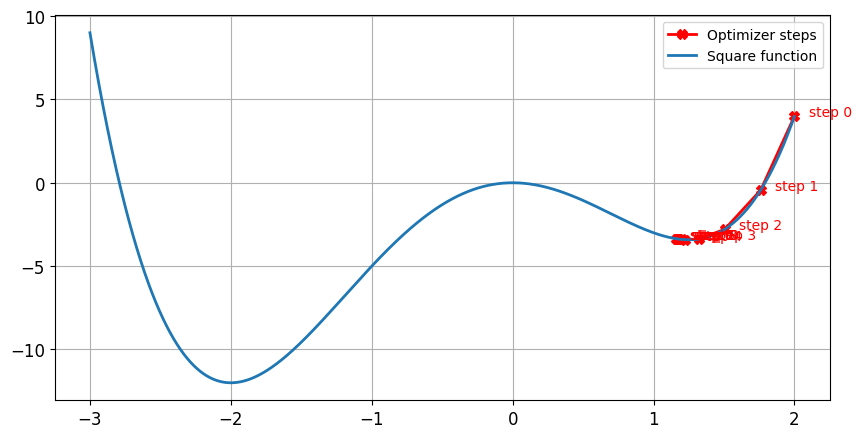

In [25]:
# Try a first value for momentum
mom0 = 0.5
optimize_and_plot(momentum=mom0)

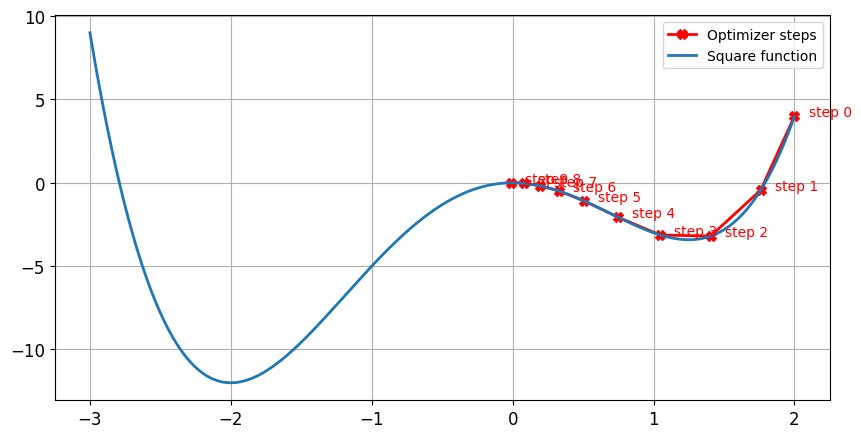

In [26]:
# Try a second value for momentum
mom1 = 0.92
optimize_and_plot(momentum=mom1)

### Freeze layers of a model
You are about to fine-tune a model on a new task after loading pre-trained weights. The model contains three linear layers. However, because your dataset is small, you only want to train the last linear layer of this model and freeze the first two linear layers.

The model has already been created and exists under the variable model. You will be using the named_parameters method of the model to list the parameters of the model. Each parameter is described by a name. This name is a string with the following naming convention: x.name where x is the index of the layer.

Remember that a linear layer has two parameters: the weight and the bias.

In [27]:
for name, parameter in model.named_parameters():
    if name == '0.weight' or name == '0.bias':
        parameter.requires_grad = False # freeze the parameters 
    
    if name == '1.weight' or name == '1.bias':
        parameter.requires_grad = False


### Layer initialization
The initialization of the weights of a neural network has been the focus of researchers for many years. When training a network, the method used to initialize the weights has a direct impact on the final performance of the network.

In [28]:
layer0 = nn.Linear(16, 32)
layer1 = nn.Linear(32, 64)

In [29]:
#use uniform initialization for layer0 and layer1 weights

nn.init.uniform_(layer0.weight)

nn.init.uniform_(layer1.weight)

Parameter containing:
tensor([[0.7401, 0.1879, 0.8940,  ..., 0.4447, 0.6148, 0.9775],
        [0.8476, 0.1937, 0.5711,  ..., 0.2293, 0.2723, 0.8752],
        [0.6936, 0.4521, 0.1772,  ..., 0.0085, 0.5799, 0.2839],
        ...,
        [0.0327, 0.2454, 0.8851,  ..., 0.4288, 0.7733, 0.3434],
        [0.5619, 0.1153, 0.0517,  ..., 0.7609, 0.0314, 0.4800],
        [0.6252, 0.9442, 0.7210,  ..., 0.3012, 0.9363, 0.6423]],
       requires_grad=True)

In [30]:
model = nn.Sequential(
    layer0, 
    layer1
)